# Random Forest Regression and Classification to Predict Physical Properties of Star Forming Region: Temperature, Mass, & Stellar Classification

## Table of contents

### 1. Dataset description

### 2. Feature selection with random forests

### 3. Import liblaries and dataset

### 4. Cleaning up the dataset

### 5. Split data into separate training and test set

### 6. Random Forest Classifier to show the classification report and confusion matrix

### 7. Random Forest Regression to find R2 score and RMSE value

### 8. Results and conclusion 


## 1. Dataset description

###  Elia et al have provided a catalogue of star-forming regions within our galaxy. The catalogue  consists of 94,604 star-forming clumps, each listing the physical properties of the entries. I utilized a specific Machine Learning method known as Random Forest to predict and compare our results with those of Elia et al.

## 2. Feature selection with random forests

### Elia et al first measured the flux density (the power from a radio source received by the radio telescope, per unit area of the receiver) with different wavelength by using telescope. They fitted these data into spectral energy distribution (SED) fitting in order to predict the physical properties like mass and temperature. Similarly, I chose flux density with different wave length as features to perform random forest.

## 3. Import liblaries and dataset

In [2]:
# import necessary liblaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
hdr=["ID","DESIGNATION","GLON","GLAT","RA","DE","DESIGNATION_70","F70",
     "DF70","F70_TOT","DF70_TOT","F70_ADD_TOT","DF70_ADD_TOT","ULIM_70",
     "DESIGNATION_160","F160","DF160","F160_ADD","DF160_ADD","ULIM_160","DESIGNATION_250",
     "F250","DF250","DESIGNATION_350","F350","DF350","FSC350","DFSC350","DESIGNATION_500",
     "F500","DF500","FSC500","DFSC500","DESIGNATION_21","F21","DF21","F21_TOT","DF21_TOT",
     "DESIGNATION_22","F22","DF22","F22_TOT","DF22_TOT","DESIGNATION_24","F24","DF24","F24_TOT",
     "DF24_TOT","DESIGNATION_870","F870","DF870","DESIGNATION_1100","F1100","DF1100","DFWHM250",
     "DIST","VLSR","D_FLAG","R_GAL","DIAM","M_LARS","FIT_TYPE","EVOL_FLAG","MASS","DMASS","TEMP",
     "DTEMP","LAM_0_TK","L_BOL","LRATIO","T_BOL","SURF_DENS"]

In [5]:
# read and show the data
cat=pd.read_csv('Downloads/HiGAL_360_clump_catalogue.tab', 
                skiprows=4, 
                delimiter="\s+",
                names=hdr
              )
cat

,ID,DESIGNATION,GLON,GLAT,RA,DE,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,1,HIGALBM0.0002+0.2799,0.000153,0.279931,266.13256,-28.789917,-,0.000,0.000,0.000,...,1,1401.2,6.9,14.0,1.2,60.9,967.6,11.1,21.26,0.41
1,2,HIGALBM0.0035-0.0235,0.003490,-0.023500,266.43010,-28.945437,HIGALPB000.0035-0.0236,256.088,27.873,256.088,...,2,4461.1,24.4,18.3,1.6,72.1,18699.9,36.3,32.33,0.58
2,3,HIGALBM0.0043+0.1541,0.004339,0.154110,266.25750,-28.852094,HIGALPB000.0044+0.1540,7.034,1.728,7.034,...,2,4151.4,1.4,15.8,0.2,118.1,6580.2,19.5,25.53,1.55
3,4,HIGALBM0.0108+0.0372,0.010784,0.037198,266.37525,-28.907585,HIGALPB000.0108+0.0371,130.003,13.257,599.917,...,2,8898.8,18.7,14.5,0.7,108.0,110712.9,187.3,75.15,1.30
4,5,HIGALBM0.0111-0.1068,0.011087,-0.106757,266.51587,-28.982289,HIGALPB000.0111-0.1068,65.410,5.393,65.410,...,2,-62.5,28.5,15.9,1.0,94.6,-230.4,43.9,48.11,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94599,94600,HIGALBM359.8611+0.6088,359.861133,0.608828,265.72994,-28.735796,-,0.000,0.000,0.000,...,1,330.9,0.8,12.7,0.5,71.3,126.1,8.0,19.23,0.57
94600,94601,HIGALBM359.8792+0.3293,359.879185,0.329268,266.01230,-28.867165,HIGALPB359.8792+0.3292,0.811,0.131,0.811,...,2,186.7,0.6,13.3,0.5,0.0,235.1,23.2,35.95,0.11
94601,94602,HIGALBM359.9170+0.4966,359.917014,0.496642,265.87229,-28.747190,-,0.000,0.000,0.000,...,1,1418.6,6.2,10.1,0.4,53.8,143.2,4.2,15.53,0.32
94602,94603,HIGALBM359.9316+0.7497,359.931621,0.749651,265.63573,-28.601758,-,0.000,0.000,0.000,...,1,227.3,0.6,14.5,0.6,0.0,200.3,13.0,22.40,0.07


## 4. Cleaning up the dataset

### there are outliers that has extremely high value or low value in HiGAL-catalogue, which could make the error of prediction, so these kinds of data are removed.

In [7]:
# clean up the data by removing the data that has mass<0 or Luminosity<0 
clean_cat_class0=cat[(cat['MASS']>0) & (cat['L_BOL']>0)]
clean_cat_class0

,ID,DESIGNATION,GLON,GLAT,RA,DE,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,1,HIGALBM0.0002+0.2799,0.000153,0.279931,266.13256,-28.789917,-,0.000,0.000,0.000,...,1,1401.2,6.9,14.0,1.2,60.9,967.6,11.1,21.26,0.41
1,2,HIGALBM0.0035-0.0235,0.003490,-0.023500,266.43010,-28.945437,HIGALPB000.0035-0.0236,256.088,27.873,256.088,...,2,4461.1,24.4,18.3,1.6,72.1,18699.9,36.3,32.33,0.58
2,3,HIGALBM0.0043+0.1541,0.004339,0.154110,266.25750,-28.852094,HIGALPB000.0044+0.1540,7.034,1.728,7.034,...,2,4151.4,1.4,15.8,0.2,118.1,6580.2,19.5,25.53,1.55
3,4,HIGALBM0.0108+0.0372,0.010784,0.037198,266.37525,-28.907585,HIGALPB000.0108+0.0371,130.003,13.257,599.917,...,2,8898.8,18.7,14.5,0.7,108.0,110712.9,187.3,75.15,1.30
5,6,HIGALBM0.0128-0.0189,0.012823,-0.018934,266.43120,-28.935092,HIGALPB000.0129-0.0190,36.112,7.664,454.591,...,2,16363.7,49.3,14.9,1.4,152.4,24916.9,22.0,35.52,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94598,94599,HIGALBM359.8569+0.5480,359.856854,0.548027,265.78637,-28.771398,-,0.000,0.000,0.000,...,1,1681.0,5.7,11.0,0.4,0.0,290.5,5.4,17.07,0.22
94599,94600,HIGALBM359.8611+0.6088,359.861133,0.608828,265.72994,-28.735796,-,0.000,0.000,0.000,...,1,330.9,0.8,12.7,0.5,71.3,126.1,8.0,19.23,0.57
94600,94601,HIGALBM359.8792+0.3293,359.879185,0.329268,266.01230,-28.867165,HIGALPB359.8792+0.3292,0.811,0.131,0.811,...,2,186.7,0.6,13.3,0.5,0.0,235.1,23.2,35.95,0.11
94601,94602,HIGALBM359.9170+0.4966,359.917014,0.496642,265.87229,-28.747190,-,0.000,0.000,0.000,...,1,1418.6,6.2,10.1,0.4,53.8,143.2,4.2,15.53,0.32


In [9]:
# clean up the data by removing the data that has mass<0 or Luminosity<0 
clean_cat=cat[(cat['MASS']>0) & (cat['L_BOL']>0) ]
clean_cat

,ID,DESIGNATION,GLON,GLAT,RA,DE,DESIGNATION_70,F70,DF70,F70_TOT,...,EVOL_FLAG,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS
0,1,HIGALBM0.0002+0.2799,0.000153,0.279931,266.13256,-28.789917,-,0.000,0.000,0.000,...,1,1401.2,6.9,14.0,1.2,60.9,967.6,11.1,21.26,0.41
1,2,HIGALBM0.0035-0.0235,0.003490,-0.023500,266.43010,-28.945437,HIGALPB000.0035-0.0236,256.088,27.873,256.088,...,2,4461.1,24.4,18.3,1.6,72.1,18699.9,36.3,32.33,0.58
2,3,HIGALBM0.0043+0.1541,0.004339,0.154110,266.25750,-28.852094,HIGALPB000.0044+0.1540,7.034,1.728,7.034,...,2,4151.4,1.4,15.8,0.2,118.1,6580.2,19.5,25.53,1.55
3,4,HIGALBM0.0108+0.0372,0.010784,0.037198,266.37525,-28.907585,HIGALPB000.0108+0.0371,130.003,13.257,599.917,...,2,8898.8,18.7,14.5,0.7,108.0,110712.9,187.3,75.15,1.30
5,6,HIGALBM0.0128-0.0189,0.012823,-0.018934,266.43120,-28.935092,HIGALPB000.0129-0.0190,36.112,7.664,454.591,...,2,16363.7,49.3,14.9,1.4,152.4,24916.9,22.0,35.52,2.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94598,94599,HIGALBM359.8569+0.5480,359.856854,0.548027,265.78637,-28.771398,-,0.000,0.000,0.000,...,1,1681.0,5.7,11.0,0.4,0.0,290.5,5.4,17.07,0.22
94599,94600,HIGALBM359.8611+0.6088,359.861133,0.608828,265.72994,-28.735796,-,0.000,0.000,0.000,...,1,330.9,0.8,12.7,0.5,71.3,126.1,8.0,19.23,0.57
94600,94601,HIGALBM359.8792+0.3293,359.879185,0.329268,266.01230,-28.867165,HIGALPB359.8792+0.3292,0.811,0.131,0.811,...,2,186.7,0.6,13.3,0.5,0.0,235.1,23.2,35.95,0.11
94601,94602,HIGALBM359.9170+0.4966,359.917014,0.496642,265.87229,-28.747190,-,0.000,0.000,0.000,...,1,1418.6,6.2,10.1,0.4,53.8,143.2,4.2,15.53,0.32


In [10]:
# create new column 'perc' that has uncertainty of mass in percentage
dffff=pd.DataFrame(clean_cat['DMASS']*100/clean_cat['MASS'], columns=['perc'])
dff=dffff.sort_values(by=['perc'])
dff[dff['perc']>100]


,perc
71352,1.000073e+02
11672,1.000075e+02
9560,1.000153e+02
18640,1.000153e+02
21252,1.000163e+02
...,...
71551,8.786500e+05
87233,8.833000e+05
85985,9.206000e+05
64110,2.067600e+06


In [12]:
# add new column to original dataframe
cat['perc'] = dffff
cat

,ID,DESIGNATION,GLON,GLAT,RA,DE,DESIGNATION_70,F70,DF70,F70_TOT,...,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS,perc
0,1,HIGALBM0.0002+0.2799,0.000153,0.279931,266.13256,-28.789917,-,0.000,0.000,0.000,...,1401.2,6.9,14.0,1.2,60.9,967.6,11.1,21.26,0.41,0.492435
1,2,HIGALBM0.0035-0.0235,0.003490,-0.023500,266.43010,-28.945437,HIGALPB000.0035-0.0236,256.088,27.873,256.088,...,4461.1,24.4,18.3,1.6,72.1,18699.9,36.3,32.33,0.58,0.546950
2,3,HIGALBM0.0043+0.1541,0.004339,0.154110,266.25750,-28.852094,HIGALPB000.0044+0.1540,7.034,1.728,7.034,...,4151.4,1.4,15.8,0.2,118.1,6580.2,19.5,25.53,1.55,0.033724
3,4,HIGALBM0.0108+0.0372,0.010784,0.037198,266.37525,-28.907585,HIGALPB000.0108+0.0371,130.003,13.257,599.917,...,8898.8,18.7,14.5,0.7,108.0,110712.9,187.3,75.15,1.30,0.210141
4,5,HIGALBM0.0111-0.1068,0.011087,-0.106757,266.51587,-28.982289,HIGALPB000.0111-0.1068,65.410,5.393,65.410,...,-62.5,28.5,15.9,1.0,94.6,-230.4,43.9,48.11,1.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94599,94600,HIGALBM359.8611+0.6088,359.861133,0.608828,265.72994,-28.735796,-,0.000,0.000,0.000,...,330.9,0.8,12.7,0.5,71.3,126.1,8.0,19.23,0.57,0.241765
94600,94601,HIGALBM359.8792+0.3293,359.879185,0.329268,266.01230,-28.867165,HIGALPB359.8792+0.3292,0.811,0.131,0.811,...,186.7,0.6,13.3,0.5,0.0,235.1,23.2,35.95,0.11,0.321371
94601,94602,HIGALBM359.9170+0.4966,359.917014,0.496642,265.87229,-28.747190,-,0.000,0.000,0.000,...,1418.6,6.2,10.1,0.4,53.8,143.2,4.2,15.53,0.32,0.437051
94602,94603,HIGALBM359.9316+0.7497,359.931621,0.749651,265.63573,-28.601758,-,0.000,0.000,0.000,...,227.3,0.6,14.5,0.6,0.0,200.3,13.0,22.40,0.07,0.263968


In [36]:
# clean up the data by removing the data that has mass<0 or Luminosity<0 or uncertainty of mass > 200% or mass<10
clean_cat_new=cat[(cat['MASS']>0) & (cat['L_BOL']>0) & (cat['perc']<200) & (cat['MASS']>10) ]
clean_cat_new

,ID,DESIGNATION,GLON,GLAT,RA,DE,DESIGNATION_70,F70,DF70,F70_TOT,...,MASS,DMASS,TEMP,DTEMP,LAM_0_TK,L_BOL,LRATIO,T_BOL,SURF_DENS,perc
0,1,HIGALBM0.0002+0.2799,0.000153,0.279931,266.13256,-28.789917,-,0.000,0.000,0.000,...,1401.2,6.9,14.0,1.2,60.9,967.6,11.1,21.26,0.41,0.492435
1,2,HIGALBM0.0035-0.0235,0.003490,-0.023500,266.43010,-28.945437,HIGALPB000.0035-0.0236,256.088,27.873,256.088,...,4461.1,24.4,18.3,1.6,72.1,18699.9,36.3,32.33,0.58,0.546950
2,3,HIGALBM0.0043+0.1541,0.004339,0.154110,266.25750,-28.852094,HIGALPB000.0044+0.1540,7.034,1.728,7.034,...,4151.4,1.4,15.8,0.2,118.1,6580.2,19.5,25.53,1.55,0.033724
3,4,HIGALBM0.0108+0.0372,0.010784,0.037198,266.37525,-28.907585,HIGALPB000.0108+0.0371,130.003,13.257,599.917,...,8898.8,18.7,14.5,0.7,108.0,110712.9,187.3,75.15,1.30,0.210141
5,6,HIGALBM0.0128-0.0189,0.012823,-0.018934,266.43120,-28.935092,HIGALPB000.0129-0.0190,36.112,7.664,454.591,...,16363.7,49.3,14.9,1.4,152.4,24916.9,22.0,35.52,2.59,0.301277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94598,94599,HIGALBM359.8569+0.5480,359.856854,0.548027,265.78637,-28.771398,-,0.000,0.000,0.000,...,1681.0,5.7,11.0,0.4,0.0,290.5,5.4,17.07,0.22,0.339084
94599,94600,HIGALBM359.8611+0.6088,359.861133,0.608828,265.72994,-28.735796,-,0.000,0.000,0.000,...,330.9,0.8,12.7,0.5,71.3,126.1,8.0,19.23,0.57,0.241765
94600,94601,HIGALBM359.8792+0.3293,359.879185,0.329268,266.01230,-28.867165,HIGALPB359.8792+0.3292,0.811,0.131,0.811,...,186.7,0.6,13.3,0.5,0.0,235.1,23.2,35.95,0.11,0.321371
94601,94602,HIGALBM359.9170+0.4966,359.917014,0.496642,265.87229,-28.747190,-,0.000,0.000,0.000,...,1418.6,6.2,10.1,0.4,53.8,143.2,4.2,15.53,0.32,0.437051


## 5. Split data into separated training and test set

In [25]:
# create confusion matrix for stellar classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# set the feature(flux density with different wavelength measured from telescope)
features = ['F70','F160','F250','F350','F500','F21','F22','F24','F870','F1100','DFWHM250']

# set x and y value
X = clean_cat[features]
y = clean_cat['EVOL_FLAG']

# perform test train split , dividnig into two dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=42)

In [29]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape 

((51433, 11), (25334, 11))

## 6. Random Forest Classifier with number of estimator = 25 and 100 to show the classification report and confusion matrix

### I performed random forest classifier with dirrenent number of estimators, but the results didn't really change.

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2295
           1       0.92      0.97      0.95     13276
           2       1.00      0.96      0.98      9763

    accuracy                           0.94     25334
   macro avg       0.91      0.88      0.89     25334
weighted avg       0.94      0.94      0.94     25334



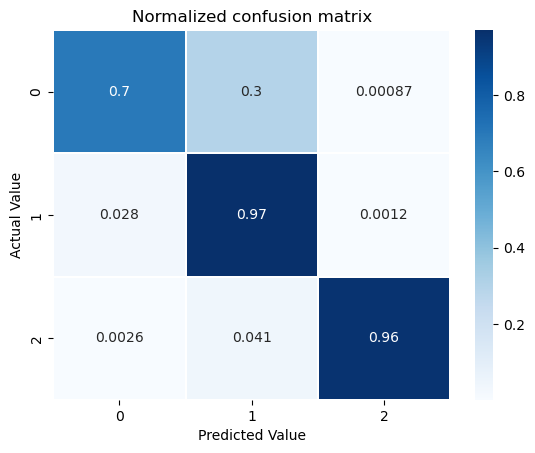

In [30]:
# create confusion matrix for stellar classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# set the feature(flux density with different wavelength measured from telescope)
features = ['F70','F160','F250','F350','F500','F21','F22','F24','F870','F1100','DFWHM250']

# set x and y value
X = clean_cat[features]
y = clean_cat['EVOL_FLAG']

# perform test train split , dividnig into two dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=42)

# fit the train data to random forest algorithm to learn trends
# set the number of estimators
rf=RandomForestClassifier(n_estimators=25) 
rf.fit(X_train, y_train)

# precit the data besed on trained data by using test data
pred=rf.predict(X_test)

# declare confusion matrix
cf_matrix = confusion_matrix(y_test, pred)

# normalize value
cm_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

#create heatmap
s = sns.heatmap(cm_normalized, annot=True, linewidths = 0.01 , cmap='Blues')
s.set(xlabel='Predicted Value', ylabel='Actual Value', title = 'Normalized confusion matrix')

#print matrix
print(classification_report(y_test, pred))



### confusion matrix of stellar classification trained with HiGAL-clump-catalogue. Note that 70% accuracy to predict class-0, 97 % accuracy to predict class-1 and 96 % for class-2 (class-0: starless unbound; class-1: pre-stellar; class-2: protostellar) 
 

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2295
           1       0.92      0.97      0.95     13276
           2       1.00      0.96      0.98      9763

    accuracy                           0.94     25334
   macro avg       0.91      0.88      0.89     25334
weighted avg       0.94      0.94      0.94     25334



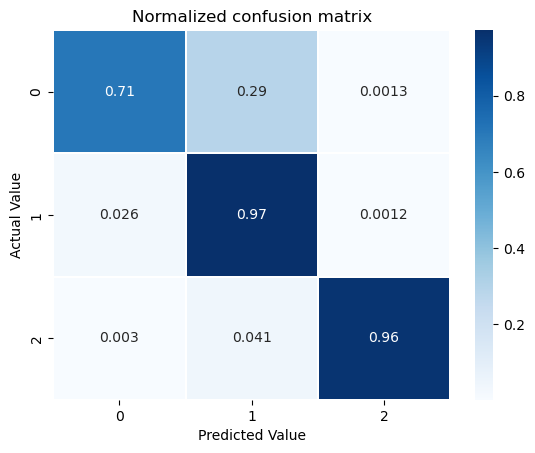

In [15]:
# create confusion matrix for stellar classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# set the feature(flux density with different wavelength measured from telescope)
features = ['F70','F160','F250','F350','F500','F21','F22','F24','F870','F1100','DFWHM250']

# set x and y value
X = clean_cat[features]
y = clean_cat['EVOL_FLAG']

# perform test train split , dividnig into two dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                   random_state=42)

# fit the train data to random forest algorithm to learn trends
# set the number of estimators
rf=RandomForestClassifier(n_estimators=100) 
rf.fit(X_train, y_train)

# precit the data besed on trained data by using test data
pred=rf.predict(X_test)

# declare confusion matrix
cf_matrix = confusion_matrix(y_test, pred)

# normalize value
cm_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

#create heatmap
s = sns.heatmap(cm_normalized, annot=True, linewidths = 0.01 , cmap='Blues')
s.set(xlabel='Predicted Value', ylabel='Actual Value', title = 'Normalized confusion matrix')

#print matrix
print(classification_report(y_test, pred))



### confusion matrix of stellar classification trained with HiGAL-clump-catalogue. Note that 71% accuracy to predict class-0, 97 % accuracy to predict class-1 and 96 % for class-2 (class-0: starless unbound; class-1: pre-stellar; class-2: protostellar) 
 


## 7. Random Forest Regression to find R2 score and RMSE value

### In addition to the mass of clump, catalogue had the uncertainty of physical properties obtained from fitting using flux density. I calculated the average error of physical properties and compared those data with data I got from random forest regression in order to check the the accuracy of prediction. Also, I investigated the R2 score and RMSE value to clarify how well a model can predict the value of the response variable

## Random Forest Regression with mass


average error of prediction in percentage:  51.54082655674241
average error of mass from catalogue in percentage:  39.72413619652956
R2 Score is: 0.6698401157633534, Note closer to 1 is better!
RMSE is: 1266.8052305971864


Text(0.5, 1.0, ' mass from original data with uncertainty and predicted mass : random forest Regression')

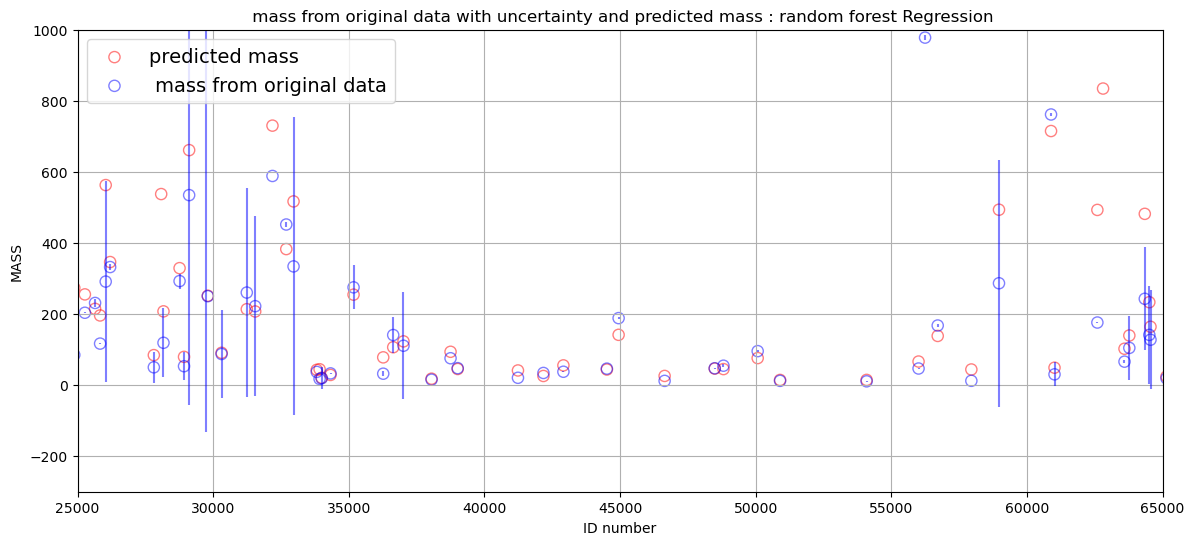

In [37]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# set features(flux density with different wavelength measured from telescope)
features = ['F70','F160','F250','F350','F500','F21','F22','F24','F870','F1100','DFWHM250','DIST']

x = clean_cat_new[features] 
y = clean_cat_new['MASS']
z = clean_cat_new['DMASS']
q = clean_cat_new['ID']

kws = {"s": 65, "facecolor": "none", "linewidth": 1.0}

# perform test train split , dividnig into two datasets
X_train, X_test, y_train, y_test,z_train, z_test,q_train, q_test = train_test_split(x, y, z, q, test_size=0.2, random_state=0)

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=1)
rf.fit(X_train, y_train)

# Make predictions on test data
pred = rf.predict(X_test)

#% Store in DF
df = X_test.copy()
df['MASS'] = y_test
df['predicted mass']= pred
df['sample num'] = q_test
df['actual error of mass'] = z_test
df['%error of prediction'] = np.abs(df['MASS']-df['predicted mass'])*100/df['MASS']
df['%error of actual mass'] = (df['actual error of mass']*100)/df['MASS']
dfRandom = df.sample(n = 200)


aveerrpred = df['%error of prediction'].sum() / 11316
aveerrmass = df['%error of actual mass'].sum() / 11316
print('average error of prediction in percentage: ', aveerrpred)
print('average error of mass from catalogue in percentage: ', aveerrmass)

# print r2 score and RMSE value
print(f"R2 Score is: {r2_score(y_test, pred)}, Note closer to 1 is better!")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test, pred))}")

# set layout and labelling
plt.figure(figsize=(14,6))
plt.ylim(-300, 1000)
plt.xlim(25000, 65000)
plt.scatter(dfRandom['sample num'], dfRandom['predicted mass'], **kws ,color='red', alpha=0.5, label="predicted mass")
plt.scatter(dfRandom['sample num'], dfRandom['MASS'], **kws ,color='blue', alpha=0.5, label=" mass from original data")
plt.errorbar(dfRandom['sample num'], dfRandom['MASS'], yerr=dfRandom['actual error of mass'], linestyle='', color='blue', alpha=0.5,)
plt.xlabel("ID number")
plt.legend(loc="upper left", fontsize=14)
plt.grid(True) 
plt.ylabel("MASS")
plt.title(" mass from original data with uncertainty and predicted mass : random forest Regression")


#Plot DF


### graph shows the distribution of predicted mass from random forest and mass from original catalogue

(0.0, 6000.0)

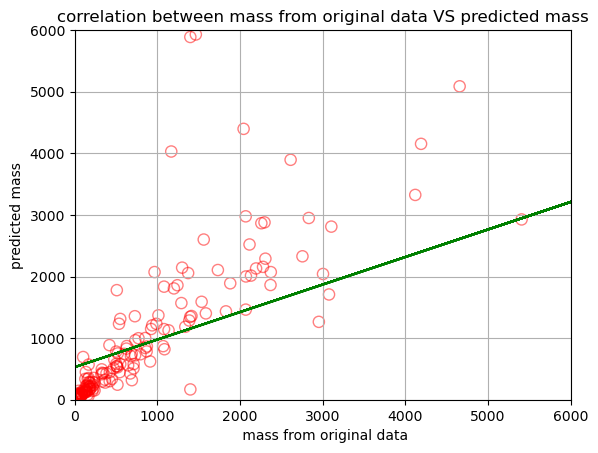

In [24]:
# create the graph that shows the correlation between original data and predicted data
plt.scatter(dfRandom['MASS'], dfRandom['predicted mass'], **kws ,color='red', alpha=0.5,)
z = np.polyfit(dfRandom['MASS'],dfRandom['predicted mass'], 1)
p = np.poly1d(z)

plt.plot(dfRandom['MASS'], p(dfRandom['MASS']),color='green')
plt.grid(True) 
plt.xlabel(" mass from original data")
plt.ylabel("predicted mass")
plt.title("correlation between mass from original data VS predicted mass")
plt.ylim(0, 6000)
plt.xlim(0, 6000)

### graph of fit line that represents the correlation of mass between data from catalogue and predicted data from random forest algorithm

## Random Forest Regression with temperature

average error of prediction in percentage:  6.411577560192971
average error of temp from catalogue in percentage:  5.89379379463667
R2 Score is: 0.8805880683371364, Note closer to 1 is better!
RMSE is: 1.3956435389388242


Text(0.5, 1.0, ' temp of original data with uncertainty and predicted temp : random forest Regression')

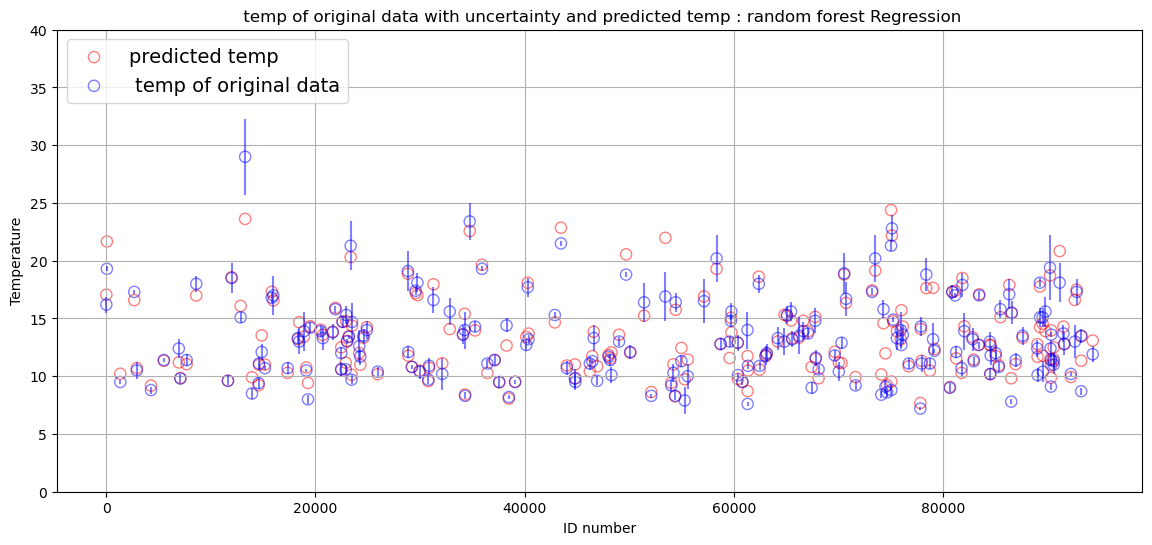

In [32]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# set feature(flux density with different wavelength measured from telescope)
features = ['F70','F160','F250','F350','F500','F21','F22','F24','F870','F1100','DFWHM250','DIST']

# set x,y,z,q value
x = clean_cat[features] 
y = clean_cat['TEMP']
z = clean_cat['DTEMP']
q = clean_cat['ID']

# set the design of plot
kws = {"s": 65, "facecolor": "none", "linewidth": 1.0}

# perform test train split , dividnig into two dataset
X_train, X_test, y_train, y_test,z_train, z_test, q_train, q_test = train_test_split(x, y, z,q, test_size=0.2, random_state=0)

rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=1)
rf.fit(X_train, y_train)

# Make predictions on test data
pred = rf.predict(X_test)

#% Store in DF
df = X_test.copy()
df['TEMP'] = y_test
df['predicted temp']= pred
df['sample num'] = q_test
df['actual error of temp'] = z_test
df['%error of prediction'] = np.abs(df['TEMP']-df['predicted temp'])*100/df['TEMP']
df['%error of actual temp'] = (df['actual error of temp']*100)/df['TEMP']
dfRandom = df.sample(n = 200)

# calculate the % error
aveerrpred = df['%error of prediction'].sum() / 13966
aveerrtemp = df['%error of actual temp'].sum() / 13966
print('average error of prediction in percentage: ', aveerrpred)
print('average error of temp from catalogue in percentage: ', aveerrtemp)

# print R2 score
print(f"R2 Score is: {r2_score(y_test, pred)}, Note closer to 1 is better!")
print(f"RMSE is: {np.sqrt(mean_squared_error(y_test, pred))}")


# print the plots
plt.figure(figsize=(14,6))
plt.ylim(0, 40)

# labelling graph
plt.scatter(dfRandom['sample num'], dfRandom['predicted temp'], **kws ,color='red', alpha=0.5, label="predicted temp")
plt.scatter(dfRandom['sample num'], dfRandom['TEMP'], **kws ,color='blue', alpha=0.5, label=" temp of original data")
plt.errorbar(dfRandom['sample num'], dfRandom['TEMP'], yerr=dfRandom['actual error of temp'], linestyle='', color='blue', alpha=0.5 )
plt.legend(loc="upper left", fontsize=14)
plt.grid(True) 
plt.xlabel("ID number")
plt.ylabel("Temperature")
plt.title(" temp of original data with uncertainty and predicted temp : random forest Regression")


#Plot DF


### graph shows the distribution of predicted temperature from random forest and temperature from original catalogue

Text(0.5, 1.0, 'correlation between temp from original data VS predicted temp')

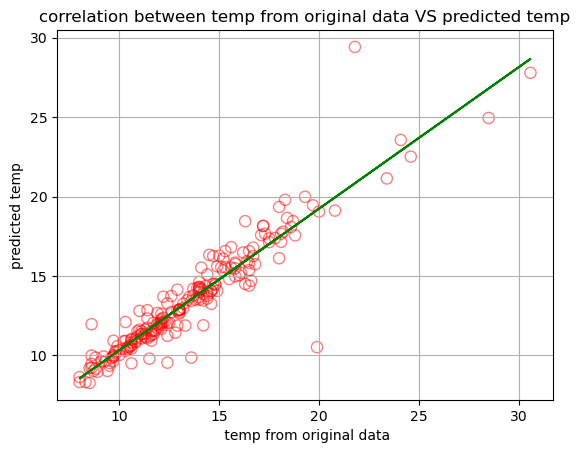

In [19]:
# create the graph that shows the correlation between original data and predicted data
plt.scatter(dfRandom['TEMP'], dfRandom['predicted temp'], **kws ,color='red', alpha=0.5, )
z = np.polyfit(dfRandom['TEMP'],dfRandom['predicted temp'], 1)
p = np.poly1d(z)

plt.plot(dfRandom['TEMP'], p(dfRandom['TEMP']),color='green')
plt.grid(True) 
plt.xlabel(" temp from original data")
plt.ylabel("predicted temp")
plt.title("correlation between temp from original data VS predicted temp")

### graph of fit line that represents the correlation of mass between data from catalogue and predicted data from random forest algorithm

## 8. Results and conclusion

### For random forest classifier, overall prediction was good although I got some errors on predicting class-0 (starless unbound). This is because class-0 represents ”starless unbound”. That is, class-0 of star forming region includes the dark cloud of hydrogen and dust, so it is not stable and difficult to measure accurately compared with class-1 and 2. These factors could be the obstacles of measuring flux density and create error on original catalogue, resulting in error on prediction.

### For random forest regression with mass, I got approximately 40% of error of mass by using the data from the original catalogue, which is huge. Therefore, it is more lilkey to have a big error on prediction ( 51 % error). This resulted in getting 1267 for RMSE. Still, I got acceptable R2 score of 0.67, which can prove that  random forests can be a good alternative for data analysis  in astronomical observations. 

### For temperature, although the RMSE is bigger than 1 (1.39), I got R2 score of 0.88. Also, the difference between average error of prediction (6.41%) and average error of temp from catalogue (5.89%) is very small. As a result, random forest did reasonably good job on predicting the temperature.

### Thoughout the project, I got some errors, but Overall the performance of random forest was prettygood. It could make the accurate prediction on both stellar classification and temperature, which can prove itseffectiveness as a good alternative to get physical properties without using SED fitting (fit flux density manually and find the physical properties for each star forming region).